<a href="https://colab.research.google.com/github/MasahiroAraki/MachineLearning/blob/master/Python/chap02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. 機械学習の基本的な手順

* 注1: Wekaの操作説明は省略し，すべてPythonを用いた説明に置き換えます．
* 注2: 「2.1.5節 ROC曲線を用いた結果の調整」は5章に移動します．


## パッケージの読み込み


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

## データの読み込み

- [load_iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)メソッドでirisデータセットを読み込む
  - as_frame: Trueのとき、data属性がpandasのDataFrame型に、target属性がpandasのSeries型になる

- irisデータセット
  - アヤメ (iris) の種類を，その萼（がく）の長さ (sepal length) ・幅 (sepal width) ，花びらの長さ (petal length) ・幅 (petal width) の，計四つの特徴を用いて識別するための学習データ
  - 各事例には，0 (Iris-setosa), 1 (Iris-versicolor), 2 (Iris-virginica) のいずれかが正解情報として付いている


In [ ]:
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target
print(iris.DESCR) # データセットの詳細の表示

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 探索的データ解析

pandasのDataFrame形式のデータは統計情報を容易に求めて表示できる

In [ ]:
# 統計情報を表示
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

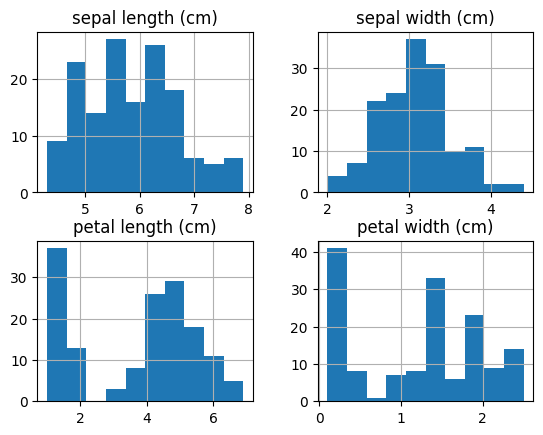

In [ ]:
# ヒストグラムでデータを可視化
X.hist()

### 次元削減 [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [ ]:
pca = PCA(n_components=2) # n_components: 削減後の次元数
X2 = pca.fit_transform(X)

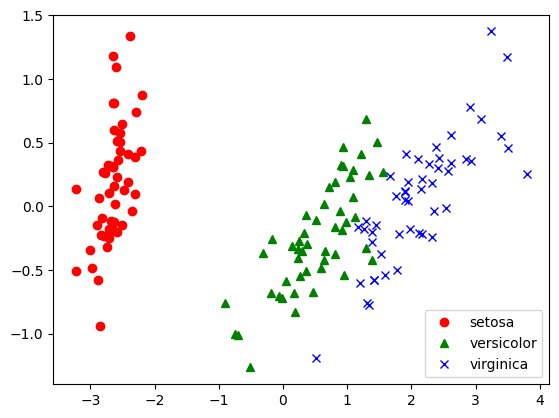

In [ ]:
color = ['ro', 'g^', 'bx']
for i in range(len(set(y))):
  plt.plot(X2[y==i,0], X2[y==i,1], color[i], label=iris.target_names[i])
plt.legend()
plt.show()

### 次元削減 [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

In [ ]:
tsne = TSNE(perplexity=5) # perplexity: 考慮する近傍のデータ数（5～50程度の値で全データ数が多いほど大きく）
X3 = tsne.fit_transform(X)

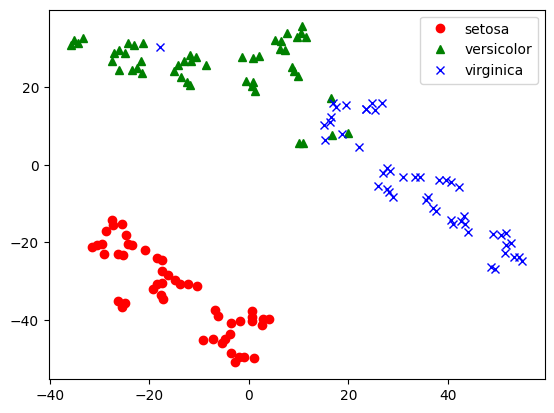

In [ ]:
color = ['ro', 'g^', 'bx']
for i in range(len(set(y))):
  plt.plot(X3[y==i,0], X3[y==i,1], color[i], label=iris.target_names[i])
plt.legend()
plt.show()

## 前処理

### 標準化 [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [ ]:
X_scaled = StandardScaler().fit_transform(X) # 平均0, 分散1に標準化
np.set_printoptions(suppress=True)
print('mean:', np.mean(X_scaled, axis=0))
print('std :', np.std(X_scaled, axis=0))

mean: [-0. -0. -0. -0.]
std : [1. 1. 1. 1.]


## 評価基準の設定

これ以降のコーディングにあたり、評価法を決めておく

- 分割学習法
  - 学習の前にデータを学習用と評価用に分割する
- 交差確認法
  - 学習時に交差確認を行うメソッドを呼び出す


## 学習

[k-NN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)による識別を行う

### 交差確認法

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1) # n_neighbors: 参照する近傍のデータ数
print(clf)

KNeighborsClassifier(n_neighbors=1)


In [ ]:
# 精度の平均値と95%信頼区間の幅（標準偏差の2倍）を計算
scores = cross_val_score(clf, X_scaled, y, cv=10) # 10-fold 交差確認
print(f'Accuracy: {scores.mean():0.2} (+/- {scores.std()*2:0.2})')

Accuracy: 0.95 (+/- 0.13)


### 分割学習法

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=7) # test_size: テストデータの割合
print(f'train data: {len(X_train)} class: {np.bincount(y_train)}')
print(f'test data : {len(X_test)}  class: {np.bincount(y_test)}')

train data: 100 class: [36 32 32]
test data : 50  class: [14 18 18]


In [ ]:
clf2 = KNeighborsClassifier(n_neighbors=1)
clf2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# 評価と混同行列の出力
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.89      0.94      0.92        18
   virginica       0.94      0.89      0.91        18

    accuracy                           0.94        50
   macro avg       0.95      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



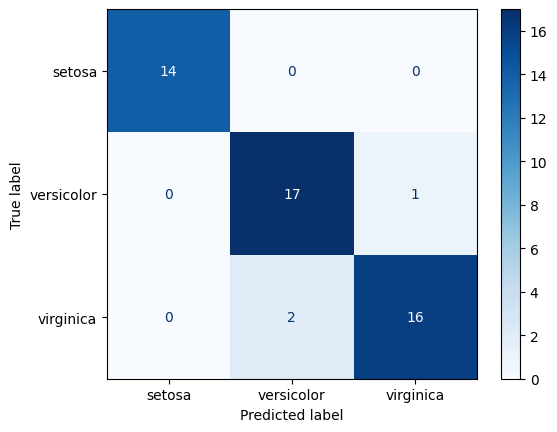

In [ ]:
# 混同行列のヒートマップによる可視化
cm = confusion_matrix(y_test, y_pred, labels=clf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.show()

## パイプライン

上記手順は標準化の際にテストデータも一緒にしてしまっているので、厳密には学習データとテストデータの分離が不十分である。前処理と学習をパイプラインでまとめてひとつの識別器とし、この識別器に対して交差確認を行うべきである。

In [ ]:
from sklearn.pipeline import Pipeline

(X, y) = load_iris(return_X_y=True)
pipe = Pipeline([('normalize', StandardScaler()),
                 ('clf', KNeighborsClassifier())])
scores = cross_val_score(pipe, X, y, cv=10)
print(f"Accuracy: {scores.mean():0.2} (+/- {scores.std()*2:0.2})")

Accuracy: 0.95 (+/- 0.1)


In [ ]:
# パイプラインの構成の表示
from sklearn import set_config
set_config(display="diagram")
pipe

Pipeline(steps=[('normalize', StandardScaler()),
                ('clf', KNeighborsClassifier())])

## 練習問題

breast cancerデータ（Scikit-learn付属のbreast cancerデータについては、教科書p.264 演習問題5.3の解説を参照してください。p.262で説明しているWeka付属の同名データとは異なることに注意）について、k-NN法で識別を行うJupyter Notebook (ipynbファイル)を作成してください。その際、データを学習用と評価用に分割し、学習用データにおいてパイプラインを使った交差確認法でk-NN法における最適な近傍数の値を1～10の範囲で求め、評価用データを用いて最適な識別器の性能を評価してください。

### 解答例



#### パッケージの読み込み

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

#### データの読み込み

In [ ]:
bc = load_breast_cancer(as_frame=True)
X = bc.data
y = bc.target
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

#### 分析

In [ ]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


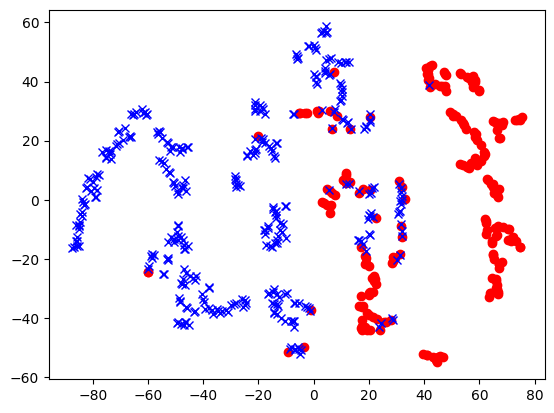

In [ ]:
tsne = TSNE(perplexity=5)
X2 = tsne.fit_transform(X)
plt.plot(X2[y==0,0], X2[y==0,1],"ro")
plt.plot(X2[y==1,0], X2[y==1,1],"bx")

#### 学習および評価

ある程度データ数があるので、データを学習用と評価用に分割し、学習用で交差確認を用いてグリッドサーチを行い、最適なハイパーパラメータで評価を行う。

データの分割

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print(f'train data: {len(X_train)} class: {np.bincount(y_train)}')
print(f'test data : {len(X_test)}  class: {np.bincount(y_test)}')

train data: 455 class: [172 283]
test data : 114  class: [40 74]


パイプラインでの学習の確認

In [ ]:
pipe = Pipeline([('normalize', StandardScaler()),
                 ('clf', KNeighborsClassifier())])
scores = cross_val_score(pipe, X_train, y_train, cv=10)
print(f"Accuracy: {scores.mean():0.2} (+/- {scores.std()*2:0.2})")

Accuracy: 0.96 (+/- 0.065)


最適なハイパーパラメータ`n_neighbors`のグリッドサーチ

In [ ]:
param_grid = dict(clf__n_neighbors=range(1,11))
clf = GridSearchCV(pipe, param_grid=param_grid)
clf.fit(X_train, y_train)
best = clf.best_estimator_
best

Pipeline(steps=[('normalize', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=3))])

最適なハイパーパラメータで評価

In [ ]:
y_pred = best.predict(X_test)
print(classification_report(y_test, y_pred, target_names=bc.target_names))

              precision    recall  f1-score   support

   malignant       1.00      0.88      0.93        40
      benign       0.94      1.00      0.97        74

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



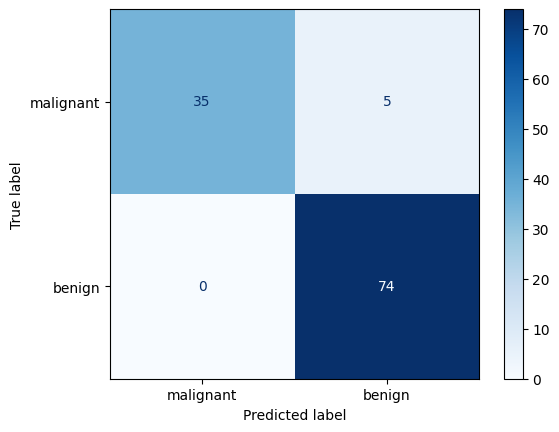

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bc.target_names)
disp.plot(cmap='Blues')
plt.show()

## 参考

* PCA https://scikit-learn.org/stable/modules/decomposition.html#pca
* Cross validation https://scikit-learn.org/stable/modules/cross_validation.html
* kNN https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* Metrics https://scikit-learn.org/stable/modules/model_evaluation.html
* Pipeline https://scikit-learn.org/stable/modules/compose.html#combining-estimators